In [28]:
import os

fcndir = os.path.join('models', 'FCN-detector')
imagedir = os.path.join('data_road', 'training', 'image_2')
labeldir = os.path.join('data_road', 'training', 'gt_image_2')

In [29]:
import tensorflow as tf

fcnmodel = tf.keras.models.load_model(fcndir)

In [31]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def load_data(filenames):
    images = []
    for file in filenames:
        img = cv2.imread(file)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.copyMakeBorder(img, (384-img.shape[0]), 0, 0, (1248-img.shape[1]), cv2.BORDER_CONSTANT, (0,0,0)) / 255
        images.append(img)

    return np.array(images)


files = os.listdir(imagedir)
files = [os.path.join(imagedir, x) for x in files]

data = load_data(files[:4])
_data = tf.data.Dataset.from_tensor_slices(data)
_data = _data.batch(1)
prediction = fcnmodel.predict(_data)

fig, axs = plt.subplots(2,2, figsize=(15,8))
def overlay(image, label):
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            if label[i,j,1] > 0.5:
                image[i,j] = np.array([0,1,0])
    return image

for i, p in enumerate(prediction):
    image = overlay(data[i], p)
    axs[int(i / 2), int(i % 2)].imshow(image)

2022-04-29 16:54:38.755861: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


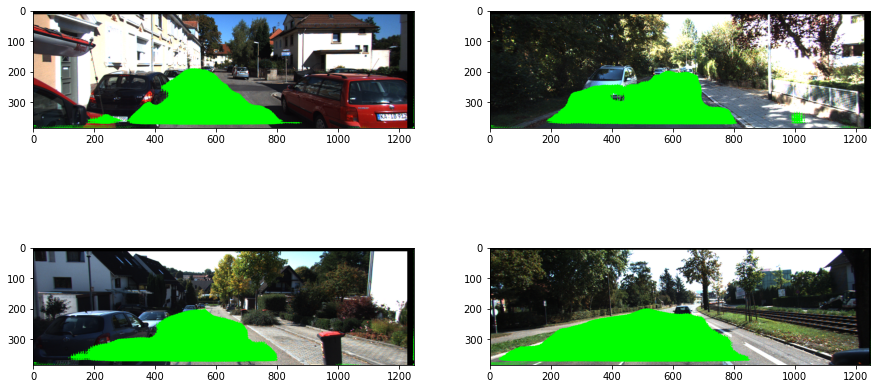